In [22]:
#library(tidyverse)
#library(httr)
#library(jsonlite)
library(visdat)

#Just importing the necessary libraries.

In [9]:
get_transit = GET(url = "https://services2.arcgis.com/JkPEgZJGxhSjYOo0/arcgis/rest/services/OpenData_TransitLanes/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")

#https://www.geeksforgeeks.org/accessing-rest-api-using-r-programming/ - This page was very helpful in using the API

#Here I have just used HTTR to grab the data from the API.


In [10]:
get_transit_text = content(get_transit, "text", encoding = "UTF-8") #Converting the retrieved data into text. This is done so we can convert into a json and eventually a list or dataframe.
get_transit_text

#Here I have converted the data retrieved from the API into text. This will allow me to convert the data into a 
#json and eventually a dataframe.


[1] "{\"objectIdFieldName\":\"OBJECTID\",\"uniqueIdField\":{\"name\":\"OBJECTID\",\"isSystemMaintained\":true},\"globalIdFieldName\":\"\",\"geometryProperties\":{\"shapeLengthFieldName\":\"Shape__Length\",\"units\":\"esriMeters\"},\"geometryType\":\"esriGeometryPolyline\",\"spatialReference\":{\"wkid\":4326,\"latestWkid\":4326},\"fields\":[{\"name\":\"OBJECTID\",\"type\":\"esriFieldTypeOID\",\"alias\":\"OBJECTID\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"LANESTART\",\"type\":\"esriFieldTypeString\",\"alias\":\"Lane Start\",\"sqlType\":\"sqlTypeOther\",\"length\":255,\"domain\":null,\"defaultValue\":null},{\"name\":\"LANEEND\",\"type\":\"esriFieldTypeString\",\"alias\":\"Lane End\",\"sqlType\":\"sqlTypeOther\",\"length\":255,\"domain\":null,\"defaultValue\":null},{\"name\":\"SVLType\",\"type\":\"esriFieldTypeString\",\"alias\":\"SVL Type\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"OperatingDay\",\"type\":\"esriFieldTypeString\",\"alias\":\"Operating Day\",\"sqlType\":\"sqlTypeOther\",\"length\":20,\"domain\":null,\"defaultValue\":null},{\"name\":\"StartingHourM\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Starting Hour Morning\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"EndingHourM\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Ending Hour Morning\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"EndingHourE\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Ending Hour Evening\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"LanePositionNew\",\"type\":\"esriFieldTypeString\",\"alias\":\"Lane Position \",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"StartingHourE\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Starting Hour Evening\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"Shape__Length\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Shape__Length\",\"sqlType\":\"sqlTypeDouble\",\"domain\":null,\"defaultValue\":null}],\"features\":[{\"attributes\":{\"OBJECTID\":1,\"LANESTART\":\"129 Anzac Avenue (NE of Waterloo Quadrant)\",\"LANEEND\":\"23 Anzac Avenue (S of Beach Road)\",\"SVLType\":\"Bus\",\"OperatingDay\":\"24/7\",\"StartingHourM\":null,\"EndingHourM\":null,\"EndingHourE\":null,\"LanePositionNew\":\"Kerbside\",\"StartingHourE\":null,\"Shape__Length\":535.363519712575},\"geometry\":{\"paths\":[[[174.772483869833,-36.8500732406884],[174.77288904291,-36.8497571716096],[174.773177429195,-36.8495239268414],[174.773270371076,-36.8494366870664],[174.773301914584,-36.8494011631331],[174.773390315702,-36.8492980282271],[174.773440718923,-36.8491888219064],[174.77349252594,-36.8490420356266],[174.773492525649,-36.8488909650319],[174.773466061202,-36.8487498192694],[174.773382755362,-36.8485184156992],[174.773272083546,-36.8483613260773],[174.77299853168,-36.8480804233551],[174.772539416276,-36.8476663525317],[174.772484701499,-36.847609933255],[174.772374118088,-36.8475114206654],[174.772243539495,-36.8473822035207],[174.772188660016,-36.8473186316874],[174.772108906667,-36.8472188154347],[174.772107750078,-36.8472171985443],[174.771483288277,-36.8460243208161]]]}},{\"attributes\":{\"OBJECTID\":2,\"LANESTART\":\"2 Anzac Avenue (S of Beach Road)\",\"LANEEND\":\"152 Anzec Avenue (NE cnr Alten Road)\",\"SVLType\":\"Bus\",\"OperatingDay\":\"24/7\",\"StartingHourM\":null,\"EndingHourM\":null,\"EndingHourE\":null,\"LanePositionNew\":\"Kerbside\",\"StartingHourE\":null,\"Shape__Length\":543.62186611427},\"geometry\":{\"paths\":[[[174.771642353099,-36.8460263960275],[174.771902594162,-36.8465346546238],[174.772164322025,-36.847042890399],[174.772249114314,-36.8471811368924],[174.77247417286,-36.8474566508977],[174.773163361632,-36.8480647612546],[174.773348823241,-36.8482375648936],[174.773390521932,-36.8482933181036],[174.773492719106,-36.8484462094374],[174.7736172292

In [11]:
get_transit_json <- fromJSON(get_transit_text, flatten = TRUE) #Converting into a JSON
get_transit_json

#I have converted the text into a json. This is so I can now convert this into a dataframe and start doing
#some wrangling.


,name,type,alias,sqlType,domain,defaultValue,length
,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<int>
1,OBJECTID,esriFieldTypeOID,OBJECTID,sqlTypeOther,NA,NA,NA
2,LANESTART,esriFieldTypeString,Lane Start,sqlTypeOther,NA,NA,255
3,LANEEND,esriFieldTypeString,Lane End,sqlTypeOther,NA,NA,255
4,SVLType,esriFieldTypeString,SVL Type,sqlTypeOther,NA,NA,50
5,OperatingDay,esriFieldTypeString,Operating Day,sqlTypeOther,NA,NA,20
6,StartingHourM,esriFieldTypeDouble,Starting Hour Morning,sqlTypeOther,NA,NA,NA
7,EndingHourM,esriFieldTypeDouble,Ending Hour Morning,sqlTypeOther,NA,NA,NA
8,EndingHourE,esriFieldTypeDouble,Ending Hour Evening,sqlTypeOther,NA,NA,NA
9,LanePositionNew,esriFieldTypeString,Lane Position,sqlTypeOther,NA,NA,50


In [12]:
get_transit_dataframe = as.data.frame(get_transit_json$features) 
get_transit_dataframe

#I have converted the json into a dataframe. Just as a note I had to use get_transit_json$features as this is the
#part of the json that contains the data. I was getting errors without specifying $features.

#I will start some wrangling in the next cell.

,attributes.OBJECTID,attributes.LANESTART,attributes.LANEEND,attributes.SVLType,attributes.OperatingDay,attributes.StartingHourM,attributes.EndingHourM,attributes.EndingHourE,attributes.LanePositionNew,attributes.StartingHourE,attributes.Shape__Length,geometry.paths
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,<list>
1,1,129 Anzac Avenue (NE of Waterloo Quadrant),23 Anzac Avenue (S of Beach Road),Bus,24/7,NA,NA,NA,Kerbside,NA,535.363520,"174.77248, 174.77289, 174.77318, 174.77327, 174.77330, 174.77339, 174.77344, 174.77349, 174.77349, 174.77347, 174.77338, 174.77327, 174.77300, 174.77254, 174.77248, 174.77237, 174.77224, 174.77219, 174.77211, 174.77211, 174.77148, -36.85007, -36.84976, -36.84952, -36.84944, -36.84940, -36.84930, -36.84919, -36.84904, -36.84889, -36.84875, -36.84852, -36.84836, -36.84808, -36.84767, -36.84761, -36.84751, -36.84738, -36.84732, -36.84722, -36.84722, -36.84602"
2,2,2 Anzac Avenue (S of Beach Road),152 Anzec Avenue (NE cnr Alten Road),Bus,24/7,NA,NA,NA,Kerbside,NA,543.621866,"174.77164, 174.77190, 174.77216, 174.77225, 174.77247, 174.77316, 174.77335, 174.77339, 174.77349, 174.77362, 174.77363, 174.77361, 174.77354, 174.77350, 174.77346, 174.77340, 174.77284, 174.77283, 174.77261, -36.84603, -36.84653, -36.84704, -36.84718, -36.84746, -36.84806, -36.84824, -36.84829, -36.84845, -36.84876, -36.84903, -36.84912, -36.84929, -36.84936, -36.84942, -36.84949, -36.84997, -36.84996, -36.85014"
3,3,732 Dominion Road (S of Kensington Avenue),1256 Dominion Road (S of Keystone Avenue),Bus,Monday to Friday,NA,NA,19,Kerbside,16,1880.924751,"174.74747, 174.74623, 174.74610, 174.74610, 174.74606, 174.74532, 174.74511, 174.74484, 174.74456, 174.74456, 174.74426, 174.74426, 174.74406, 174.74395, 174.74363, 174.74327, 174.74299, 174.74267, 174.74238, 174.74238, 174.74216, -36.88721, -36.89111, -36.89151, -36.89151, -36.89162, -36.89392, -36.89454, -36.89540, -36.89627, -36.89628, -36.89720, -36.89720, -36.89780, -36.89812, -36.89909, -36.90020, -36.90106, -36.90205, -36.90293, -36.90293, -36.90362"
4,4,Opposite 1 Centorian Drive (W of East Coast Road),55 Constellation Drive (E of Parkway Avenue),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,803.274200,"174.73767, 174.73753, 174.73752, 174.73595, 174.73438, 174.73162, 174.73008, -36.74565, -36.74573, -36.74573, -36.74657, -36.74741, -36.74878, -36.74954"
5,5,42 Constellation Drive (E of Home Place),8 Constellation Drive (W of Centorian Drive),T2,Monday to Friday,NA,NA,19,Kerbside,16,702.785372,"174.73004, 174.73158, 174.73290, 174.73422, 174.73422, 174.73468, 174.73521, 174.73569, 174.73578, 174.73669, -36.74942, -36.74866, -36.74801, -36.74735, -36.74735, -36.74712, -36.74682, -36.74657, -36.74652, -36.74603"
6,6,231 East Coast Road (SE of Sunnynook Road),Opposite 258 East Coast Road (N of Forrest Hill Rbout),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,551.231020,"174.74830, 174.74905, 174.74974, 174.75018, 174.75052, 174.75072, 174.75091, 174.75117, 174.75138, 174.75150, 174.75158, 174.75158, 174.75156, 174.75155, 174.75147, 174.75117, -36.75165, -36.75214, -36.75247, -36.75266, -36.75286, -36.75300, -36.75317, -36.75347, -36.75375, -36.75397, -36.75425, -36.75429, -36.75457, -36.75461, -36.75482, -36.75532"
7,7,Opposite 268 Forrest Hill Road (S of East Coast Road Rbout),149 Forrest Hill Road (N of Seine Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1286.944204,"174.75105, 174.75102, 174.75097, 174.75086, 174.75081, 174.75063, 174.75031, 174.74984, 174.74959, 174.74944, 174.74939, 174.74932, 174.74920, 174.74911, 174.74906, 174.74900, 174.74888, 174.74884, 174.74874, 174.74868, 174.74857, 174.74854, 174.74839, 174.74833, 174.74826, 174.74821, 174.74814, 174.74806, 174.74805, 174.74806, 174.74808, 174.74815, 174.74852, -36.75717, -36.75756, -36.75782, -36.75808, -36.75819, -36.75843, -36.75875, -36.75916, -36.75942, -36.75965, -36.75976, -36.75994, -36.76038, -36.76074, -36.76096, -36.76126, -36.76175, -36.76195, -36.76236, -36.76260, -36.76308, -36

In [14]:
#Getting rid of the extra geometry.paths column which isn't helpful to us and wasn't in the original dataset.

get_transit_df = get_transit_dataframe %>% select(-c(geometry.paths))

get_transit_df


,attributes.OBJECTID,attributes.LANESTART,attributes.LANEEND,attributes.SVLType,attributes.OperatingDay,attributes.StartingHourM,attributes.EndingHourM,attributes.EndingHourE,attributes.LanePositionNew,attributes.StartingHourE,attributes.Shape__Length
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>
1,1,129 Anzac Avenue (NE of Waterloo Quadrant),23 Anzac Avenue (S of Beach Road),Bus,24/7,NA,NA,NA,Kerbside,NA,535.363520
2,2,2 Anzac Avenue (S of Beach Road),152 Anzec Avenue (NE cnr Alten Road),Bus,24/7,NA,NA,NA,Kerbside,NA,543.621866
3,3,732 Dominion Road (S of Kensington Avenue),1256 Dominion Road (S of Keystone Avenue),Bus,Monday to Friday,NA,NA,19,Kerbside,16,1880.924751
4,4,Opposite 1 Centorian Drive (W of East Coast Road),55 Constellation Drive (E of Parkway Avenue),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,803.274200
5,5,42 Constellation Drive (E of Home Place),8 Constellation Drive (W of Centorian Drive),T2,Monday to Friday,NA,NA,19,Kerbside,16,702.785372
6,6,231 East Coast Road (SE of Sunnynook Road),Opposite 258 East Coast Road (N of Forrest Hill Rbout),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,551.231020
7,7,Opposite 268 Forrest Hill Road (S of East Coast Road Rbout),149 Forrest Hill Road (N of Seine Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1286.944204
8,8,93 Forrest Hill Road (S of Quebec Road),17 Forrest Hill Road (N of Nile Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,610.690188
9,9,6 Shakespeare Road (S of Kitchener Road),124 Shakespeare Road (N of North Shore Hospital),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1113.464801


In [17]:
#Now that we have the dataframe, it is apparent that there is a lot of cleaning to do. I have already dropped a
#column, the column names should be changed and there are null values scattered throughout the dataset. First, I'm
#going to rename the columns to be more readable by removing the .attributes.

#https://www.tutorialspoint.com/how-to-remove-a-common-suffix-from-column-names-in-an-r-data-frame - This page was
#very helpful in making this process much quicker.

#Using gsub to remove common words in column names:
colnames(get_transit_df) = gsub("attributes.", "", colnames(get_transit_df))

get_transit_df

,OBJECTID,LANESTART,LANEEND,SVLType,OperatingDay,StartingHourM,EndingHourM,EndingHourE,LanePositionNew,StartingHourE,Shape__Length
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>
1,1,129 Anzac Avenue (NE of Waterloo Quadrant),23 Anzac Avenue (S of Beach Road),Bus,24/7,NA,NA,NA,Kerbside,NA,535.363520
2,2,2 Anzac Avenue (S of Beach Road),152 Anzec Avenue (NE cnr Alten Road),Bus,24/7,NA,NA,NA,Kerbside,NA,543.621866
3,3,732 Dominion Road (S of Kensington Avenue),1256 Dominion Road (S of Keystone Avenue),Bus,Monday to Friday,NA,NA,19,Kerbside,16,1880.924751
4,4,Opposite 1 Centorian Drive (W of East Coast Road),55 Constellation Drive (E of Parkway Avenue),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,803.274200
5,5,42 Constellation Drive (E of Home Place),8 Constellation Drive (W of Centorian Drive),T2,Monday to Friday,NA,NA,19,Kerbside,16,702.785372
6,6,231 East Coast Road (SE of Sunnynook Road),Opposite 258 East Coast Road (N of Forrest Hill Rbout),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,551.231020
7,7,Opposite 268 Forrest Hill Road (S of East Coast Road Rbout),149 Forrest Hill Road (N of Seine Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1286.944204
8,8,93 Forrest Hill Road (S of Quebec Road),17 Forrest Hill Road (N of Nile Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,610.690188
9,9,6 Shakespeare Road (S of Kitchener Road),124 Shakespeare Road (N of North Shore Hospital),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1113.464801


Rows: 274
Columns: 11
$ OBJECTID        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ LANESTART       <chr> "129 Anzac Avenue (NE of Waterloo Quadrant)", "2 Anzac~
$ LANEEND         <chr> "23 Anzac Avenue (S of Beach Road)", "152 Anzec Avenue~
$ SVLType         <chr> "Bus", "Bus", "Bus", "T2", "T2", "T2", "T2", "T2", "T2~
$ OperatingDay    <chr> "24/7", "24/7", "Monday to Friday", "Monday to Friday"~
$ StartingHourM   <dbl> NA, NA, NA, 6.3, NA, 6.3, 6.3, 6.3, 6.3, NA, NA, 6.3, ~
$ EndingHourM     <dbl> NA, NA, NA, 10, NA, 10, 10, 10, 10, 10, NA, 10, 10, 10~
$ EndingHourE     <int> NA, NA, 19, NA, 19, NA, NA, NA, NA, NA, 19, NA, NA, NA~
$ LanePositionNew <chr> "Kerbside", "Kerbside", "Kerbside", "Kerbside", "Kerbs~
$ StartingHourE   <int> NA, NA, 16, NA, 16, NA, NA, NA, NA, NA, NA, NA, NA, NA~
$ Shape__Length   <dbl> 535.363520, 543.621866, 1880.924751, 803.274200, 702.7~


OBJECTID,LANESTART,LANEEND,SVLType,OperatingDay,StartingHourM,EndingHourM,EndingHourE,LanePositionNew,StartingHourE,Shape__Length
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>
1,129 Anzac Avenue (NE of Waterloo Quadrant),23 Anzac Avenue (S of Beach Road),Bus,24/7,NA,NA,NA,Kerbside,NA,535.363520
2,2 Anzac Avenue (S of Beach Road),152 Anzec Avenue (NE cnr Alten Road),Bus,24/7,NA,NA,NA,Kerbside,NA,543.621866
3,732 Dominion Road (S of Kensington Avenue),1256 Dominion Road (S of Keystone Avenue),Bus,Monday to Friday,NA,NA,19,Kerbside,16,1880.924751
4,Opposite 1 Centorian Drive (W of East Coast Road),55 Constellation Drive (E of Parkway Avenue),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,803.274200
5,42 Constellation Drive (E of Home Place),8 Constellation Drive (W of Centorian Drive),T2,Monday to Friday,NA,NA,19,Kerbside,16,702.785372
6,231 East Coast Road (SE of Sunnynook Road),Opposite 258 East Coast Road (N of Forrest Hill Rbout),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,551.231020
7,Opposite 268 Forrest Hill Road (S of East Coast Road Rbout),149 Forrest Hill Road (N of Seine Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1286.944204
8,93 Forrest Hill Road (S of Quebec Road),17 Forrest Hill Road (N of Nile Road),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,610.690188
9,6 Shakespeare Road (S of Kitchener Road),124 Shakespeare Road (N of North Shore Hospital),T2,Monday to Friday,6.3,10,NA,Kerbside,NA,1113.464801


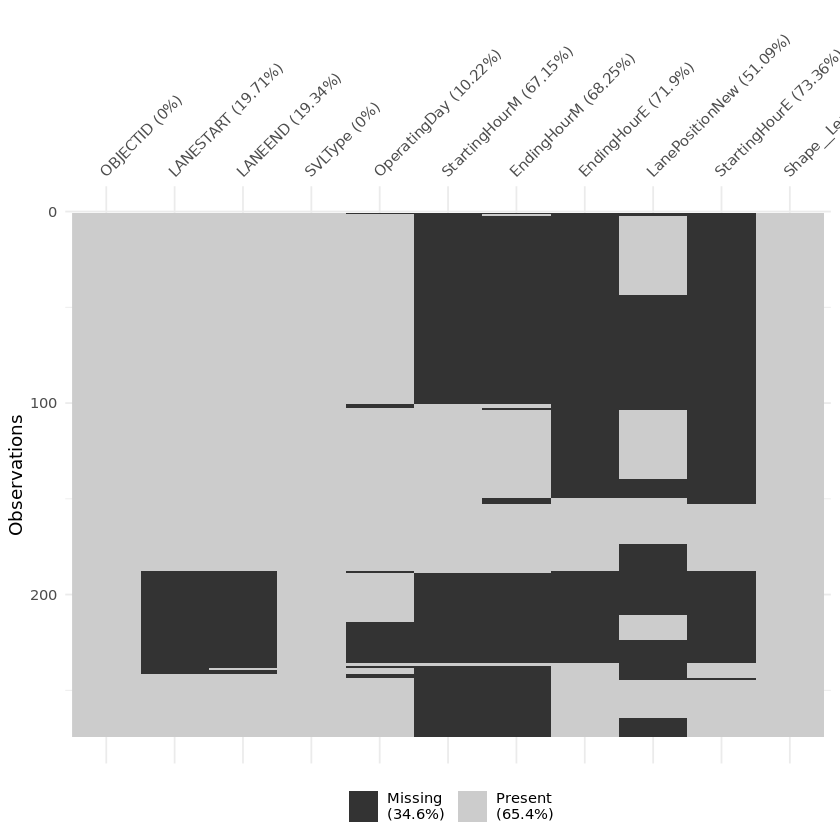

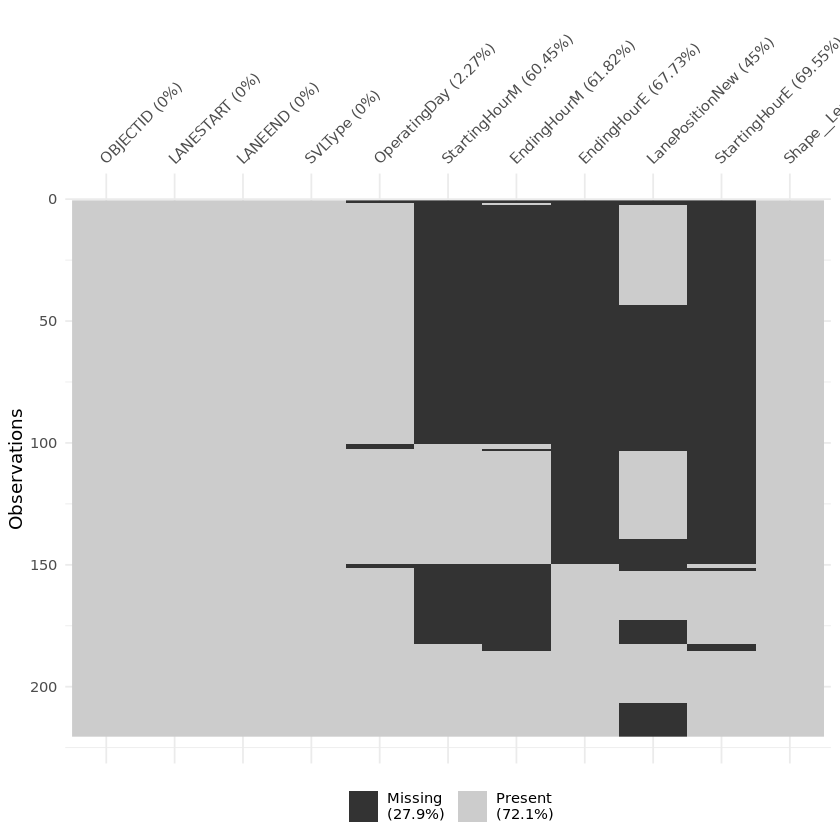

In [30]:
#Now to start dealing with some null values.

#I have used vis_miss, and as we can see 34.6% of the data is missing, with some columns being more than half
#NA values.

#It looks like some start lane and end lane values are missing. This is a problem as these two attributes are
#most likely the primary keys for this dataframe. This is an issue as you would use these attributes to join this
#dataframe with others, and also limits the usefulness of the data.

#With that in mind I am going to remove the observations that have either the start lane or end lane missing.
#https://www.codingprof.com/3-ways-to-drop-rows-with-nas-in-one-some-all-columns-in-r-examples/#:~:text=To%20remove%20observations%20with%20missing,in%20one%20or%20more%20columns.
#^ This page was helpful in doing this.

get_transit_df %>% vis_miss(cluster = TRUE)
get_transit_df %>% glimpse()

get_transit_df2 = get_transit_df %>% filter(!is.na(LANESTART) & !is.na(LANEEND))
get_transit_df2

get_transit_df2 %>% vis_miss(cluster = TRUE)